In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 10

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = []
        
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]

            line = np.array(line)


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()

    


In [6]:
def plot(points, title = 'title', picname = "noname"):

    #prepare plot
    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)
    np.shape(points)
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()

    tmask.shape

    griddata=0.0*tmask[0,0,:,:]
    griddata.shape
    np.shape(points)[0]

    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)


    Jedges.shape



    griddata.shape

    


    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)


    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])

    Jedges,Iedges=np.meshgrid(jedges,iedges)

    Jedges.shape

    griddata.shape

    xl=(-126.2,-122.2)
    yl=(47.1,51)
    


    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0, vmax = 40)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    
    axs.set_title(title)

    
    
    print ("plot ok")
    
    print (pos)
    
    plt.savefig(picname)

In [7]:
year1 = []
year2 = []
year3 = []

for file in dirs:
    month = get_pts(file)
    year1 += month [0::3]
    year2 += month [1::3]
    year3 += month [2::3]


start 20160101_20160131_427d:  2017-04-20 14:58:33.972947
time:  0:03:19.090630
start 20160201_20160229_401d:  2017-04-20 15:01:53.064268
time:  0:02:51.592259
start 20160301_20160331_355d:  2017-04-20 15:04:44.657231
time:  0:04:30.760975
start 20160401_20160430_325d:  2017-04-20 15:09:15.418563
time:  0:04:43.130447
start 20160501_20160531_294d:  2017-04-20 15:13:58.549838
time:  0:03:49.789355
start 20160601_20160630_264d:  2017-04-20 15:17:48.340113
time:  0:01:56.594405
start 20160701_20160731_252d:  2017-04-20 15:19:44.935253
time:  0:01:57.821823
start 20160801_20160831_217d:  2017-04-20 15:21:42.758539
time:  0:01:45.240510
start 20160901_20160930_172d:  2017-04-20 15:23:28.000104
time:  0:01:42.460090
start 20161001_20161031_141d:  2017-04-20 15:25:10.461184
time:  0:01:05.405837
start 20161101_20161130_111d:  2017-04-20 15:26:15.868019
time:  0:00:50.560846
start 20161201_20161231_95d:  2017-04-20 15:27:06.430050
time:  0:00:44.283781


In [8]:
#check pickle later

start:  2017-04-20 15:27:50.742863
plot ok
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


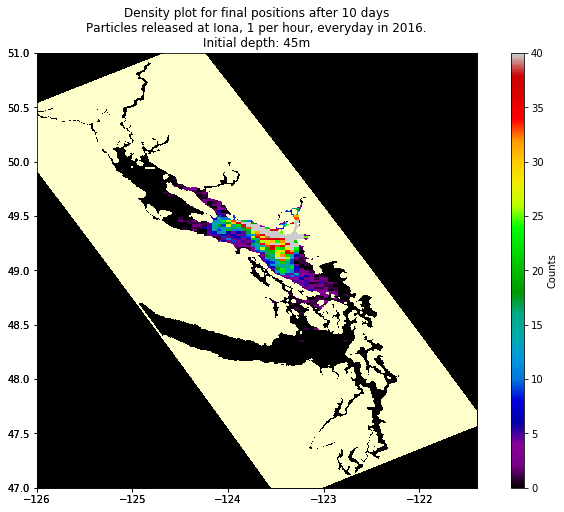

In [9]:
points = np.array(year1) #back to original name. convert to np.array

depth = 45

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

plot (points, title, picname)

start:  2017-04-20 15:27:51.756566
plot ok
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


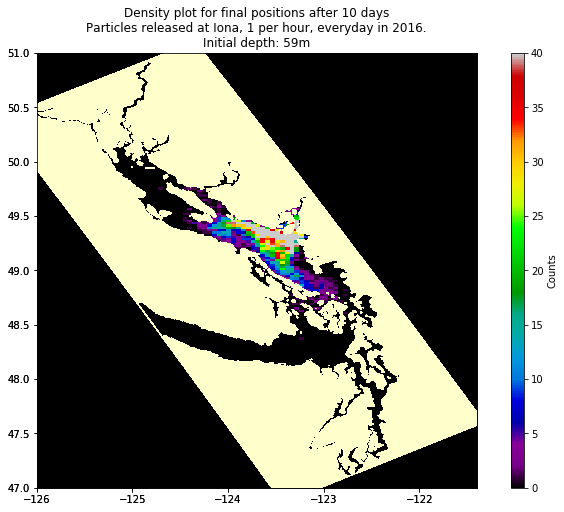

In [10]:
depth = 59

points = np.array(year2) #back to original name. convert to np.array

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)

start:  2017-04-20 15:27:52.951019
plot ok
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


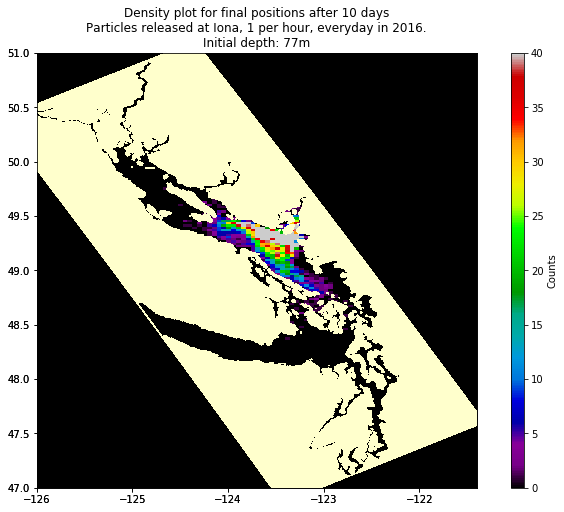

In [11]:
plt.clf()

points = np.array(year3) #back to original name. convert to np.array

depth = 77

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)